# Imports

In [37]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


## Dataset

In [38]:
df= pd.DataFrame(load_breast_cancer()['data'],
columns= load_breast_cancer()['feature_names'])

df['y']= load_breast_cancer()['target']

In [39]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
df.isnull().sum().sum()

0

In [41]:
df['mean radius'].quantile(0.99)

24.37160000000002

In [42]:
for col in list(df.columns):
    mean= df[col].mean()
    std= df[col].std()

    df= df[(df[col] <= mean + (3 * std))]

In [43]:
X = df.drop('y', axis= 1)
y = df['y']

In [44]:
# Normalization using MinMax Scalar

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Loading data into a new dataframe
dfn = df

# Selecting all columns except the target colum
cols = list(df.columns)

# Normalize the selected columns using the MinMaxScaler
dfn[cols] = scaler.fit_transform(dfn[cols])

In [45]:
dfn

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
1,0.944402,0.383627,0.913855,0.951710,0.419903,0.324144,0.341454,0.530787,0.469774,0.237775,...,0.384927,0.931266,1.000000,0.388053,0.289187,0.377559,0.731420,0.429636,0.564535,0.0
2,0.883244,0.549262,0.884114,0.852716,0.744998,0.768625,0.775639,0.967474,0.656956,0.355422,...,0.456573,0.877137,0.860515,0.575923,0.740970,0.703860,0.955564,0.786838,0.540491,0.0
4,0.924943,0.220371,0.936417,0.928370,0.623382,0.620392,0.777996,0.788956,0.467589,0.314316,...,0.157148,0.874560,0.784843,0.512084,0.324129,0.625098,0.639009,0.269868,0.360160,0.0
6,0.783168,0.488815,0.777459,0.721529,0.549235,0.490209,0.442829,0.559758,0.456664,0.264352,...,0.528557,0.883151,0.802349,0.574099,0.424019,0.591342,0.759733,0.559189,0.475372,0.0
7,0.467649,0.529272,0.475951,0.349618,0.866614,0.793786,0.368016,0.452723,0.749454,0.869950,...,0.544779,0.517141,0.401965,0.767442,0.634054,0.418503,0.611876,0.614238,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.528807,0.617325,0.539432,0.413360,0.419772,0.621486,0.404322,0.282602,0.209031,0.407867,...,0.515377,0.476759,0.309634,0.194710,0.537012,0.572277,0.434526,0.225993,0.414593,1.0
560,0.491278,0.830081,0.488053,0.367726,0.610174,0.509900,0.175324,0.325567,0.269483,0.416371,...,0.714769,0.427786,0.294500,0.390789,0.364769,0.207220,0.412112,0.222682,0.467524,1.0
565,0.913823,0.882437,0.896421,0.899396,0.590689,0.459578,0.565815,0.740620,0.426074,0.190291,...,0.886448,0.898617,0.872939,0.322389,0.299821,0.502422,0.640189,0.355960,0.186342,0.0
566,0.668497,0.874346,0.661573,0.575131,0.417419,0.453561,0.363497,0.401059,0.308084,0.231042,...,0.746874,0.655469,0.530156,0.297766,0.522390,0.531802,0.557609,0.209437,0.383870,0.0


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the top 10 features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
X_best = fit.transform(X)

# Get the selected feature names
mask = fit.get_support() # list of booleans
selected_features = X.columns[mask] # selected feature names

# Print the selected feature names
print(selected_features)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')


In [47]:
dfbest= dfn[selected_features]

dfbest

,mean radius,mean texture,mean perimeter,mean area,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area
1,0.944402,0.383627,0.913855,0.951710,0.490072,0.729396,0.978211,0.384927,0.931266,1.000000
2,0.883244,0.549262,0.884114,0.852716,0.710336,0.945684,0.896789,0.456573,0.877137,0.860515
4,0.924943,0.220371,0.936417,0.928370,0.868621,0.950129,0.837729,0.157148,0.874560,0.784843
6,0.783168,0.488815,0.777459,0.721529,0.449620,0.510722,0.857225,0.528557,0.883151,0.802349
7,0.467649,0.529272,0.475951,0.349618,0.575060,0.478740,0.523509,0.544779,0.517141,0.401965
...,...,...,...,...,...,...,...,...,...,...
558,0.528807,0.617325,0.539432,0.413360,0.272221,0.138099,0.432913,0.515377,0.476759,0.309634
560,0.491278,0.830081,0.488053,0.367726,0.395435,0.249767,0.422592,0.714769,0.427786,0.294500
565,0.913823,0.882437,0.896421,0.899396,0.825014,1.000000,0.903670,0.886448,0.898617,0.872939
566,0.668497,0.874346,0.661573,0.575131,0.495083,0.452612,0.633601,0.746874,0.655469,0.530156


## Implement the classification models

In [48]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=81)

### Decision Tree

In [49]:
# initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=69)

# train the classifier on the training data
clf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = clf.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 97.18%


### Random Forest

In [50]:
# train model
rf = RandomForestClassifier(n_estimators=100, random_state=69)
rf.fit(X_train, y_train)

# predict on test set
y_pred = rf.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.48%


### Gradient Boosting Method

In [51]:
# train model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=81)
gb.fit(X_train, y_train)

# predict on test set
y_pred = gb.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 96.48%


### K-Nearest Neighbourhour Method

In [52]:
# train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on test set
y_pred = knn.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 93.66%


## Hyperparameters of Decision Tree Model

In [53]:
criterion = ['gini','entropy']
max_depth = [10, 20, 50, 100]
min_samples_leaf = [10,20,50]

overall = []

def multiple_hyperparam(i,j,k):
  # train model
  dt = DecisionTreeClassifier(max_depth=j,criterion=i,min_samples_leaf=k)
  dt.fit(X_train, y_train)

  # predict on test set
  y_pred = dt.predict(X_test)

  # evaluate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  overall.append(accuracy)
  print(f'Accuracy when criterion:{i} , max_depth:{j} and min_samples_leaf:{k} is {accuracy}')


for i in range(0,len(criterion)):
  for j in range(0,len(max_depth)):
    for k in range(0,len(min_samples_leaf)):
      multiple_hyperparam(criterion[i],max_depth[j],min_samples_leaf[k])


print(f"\n\n\n\nThe maximum accuracy out of all the combinations is {max(overall)}")

Accuracy when criterion:gini , max_depth:10 and min_samples_leaf:10 is 0.9436619718309859
Accuracy when criterion:gini , max_depth:10 and min_samples_leaf:20 is 0.9014084507042254
Accuracy when criterion:gini , max_depth:10 and min_samples_leaf:50 is 0.9366197183098591
Accuracy when criterion:gini , max_depth:20 and min_samples_leaf:10 is 0.9436619718309859
Accuracy when criterion:gini , max_depth:20 and min_samples_leaf:20 is 0.9014084507042254
Accuracy when criterion:gini , max_depth:20 and min_samples_leaf:50 is 0.9366197183098591
Accuracy when criterion:gini , max_depth:50 and min_samples_leaf:10 is 0.9436619718309859
Accuracy when criterion:gini , max_depth:50 and min_samples_leaf:20 is 0.9014084507042254
Accuracy when criterion:gini , max_depth:50 and min_samples_leaf:50 is 0.9366197183098591
Accuracy when criterion:gini , max_depth:100 and min_samples_leaf:10 is 0.9436619718309859
Accuracy when criterion:gini , max_depth:100 and min_samples_leaf:20 is 0.9014084507042254
Accuracy

### Comparing all the models' accuracy

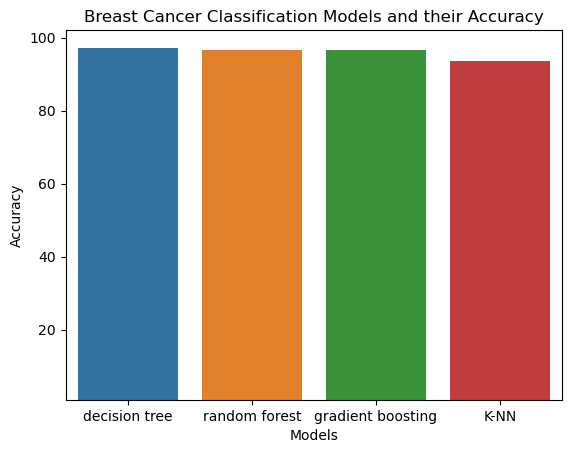

In [54]:
accu = [97.18, 96.48, 96.48, 93.66]
models = ['decision tree','random forest','gradient boosting','K-NN']

# create bar plot
sns.barplot(x=models, y=accu)
plt.ylim(.825)

# add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Breast Cancer Classification Models and their Accuracy")

# display plot
plt.show()